<a href="https://colab.research.google.com/github/androbaza/IP-algos/blob/main/3_Rank_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from imageio import imread
from imageio.core import urlopen

In [2]:
!git clone https://github.com/androbaza/standard-test-images.git

Cloning into 'standard-test-images'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


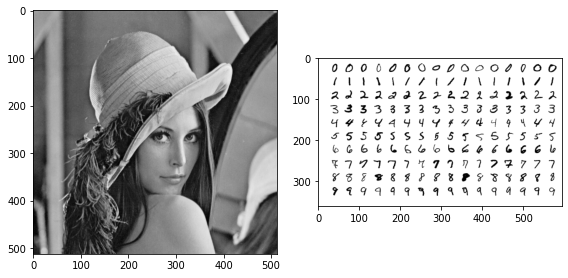

In [2]:
im = imread("/content/standard-test-images/lena_gray_512.tif")
digits = imread(urlopen('https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png').read(), '.png', pilmode='L')

fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].imshow(im, cmap=plt.cm.gray)
axs[1].imshow(digits, cmap=plt.cm.gray)
fig.tight_layout()
plt.show()

# Exercise 3: Edge and Rank Filters

## Task 3: Rank Filters

The lecture introduced rank filters like the median filter, which can be used for removing salt and pepper noise, or the minimum and maximum filter, which can be used for performing morphological operations such as dilation and erosion.

1. Implement a function that filters an image by applying a given rank operation to the neighborhood of each pixel!
2. Use this function to remove salt and pepper noise from an image! Experiment with different filter sizes!
3. Apply this function with all three rank operations to an image of handwritten digits! What can you observe?

In [4]:
print(neighbors(im, 10, 10, 5))

[159 159 160 160 160 155 159 154 154 156 154 162 159 156 159 162 156 162
 155 155 156 152 159 156 157 159 161 161 158 153 153 153 151 160 157 157
 163 157 158 159 159 154 156 157 154 155 157 161 154 155 157 157 157 157
 152 155 155 152 158 158 157 156 159 154 158 154 155 150 148 159 158 157
 157 156 155 157 158 153 159 156 160 156 158 156 156 153 156 156 157 156
 156 159 155 154 158 156 155 154 160 158 158 156 155 156 151 158 157 156
 156 155 158 157 154 157 157 157 159 155 156 154 156]


In [3]:
import numpy as np

def neighbors(im, i, j, d):
    return im[i-d:i+d+1, j-d:j+d+1].flatten()

def rank_filter(im, size, op):
    size = int(size/2)-1
    h, w = im.shape
    
    res = np.zeros_like(im)
    for i in range(0+size, h-size):
        for j in range(0+size, w-size):
            
            ### TODO: apply op to the local neighborhood of the current pixel
            
            res[i, j] = op(neighbors(im, i, j, size))
    
    return res


min_filter = lambda im, size: rank_filter(im, size, op=np.min)
max_filter = lambda im, size: rank_filter(im, size, op=np.max)
med_filter = lambda im, size: rank_filter(im, size, op=np.median)

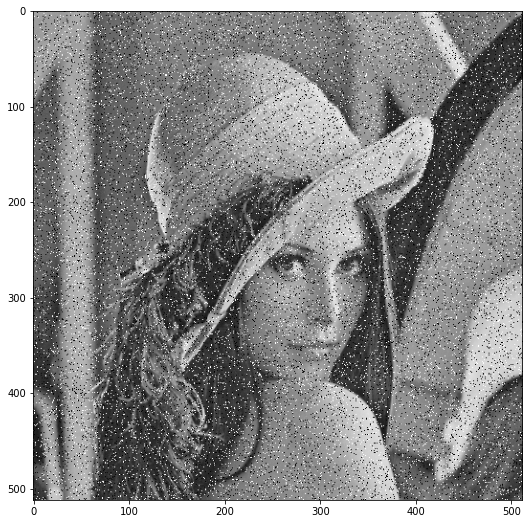

In [5]:
# Add salt and pepper noise to the image

SALT=1
PEPPER=-1

mask = np.random.choice([SALT, PEPPER, 0], size=im.shape, p=[0.05, 0.05, 0.9])

noisy_im = im.copy()
noisy_im[mask == SALT] = 255
noisy_im[mask == PEPPER] = 0

fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(noisy_im, cmap="gray")
plt.show()

CPU times: user 15.4 s, sys: 73.8 ms, total: 15.5 s
Wall time: 15.9 s


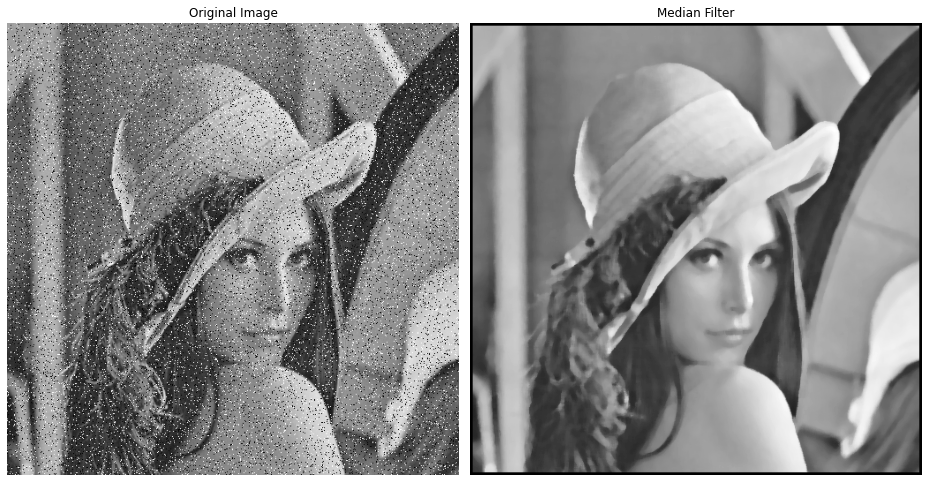

In [6]:
size = 9

%time im_med = med_filter(noisy_im, size)

fig, axs = plt.subplots(1, 2, figsize=(13,7))

axs[0].imshow(noisy_im, cmap="gray")
axs[0].set_title('Original Image')
axs[1].imshow(im_med, cmap="gray")
axs[1].set_title('Median Filter')

for ax in axs.ravel():
    ax.axis('off')
fig.tight_layout()
plt.show()

all salt and pepper noise is removed, but the image lost contrast and details

CPU times: user 4.35 s, sys: 184 ms, total: 4.53 s
Wall time: 5.91 s
CPU times: user 3.21 s, sys: 259 ms, total: 3.47 s
Wall time: 3.2 s
CPU times: user 8.32 s, sys: 16.5 ms, total: 8.34 s
Wall time: 8.72 s


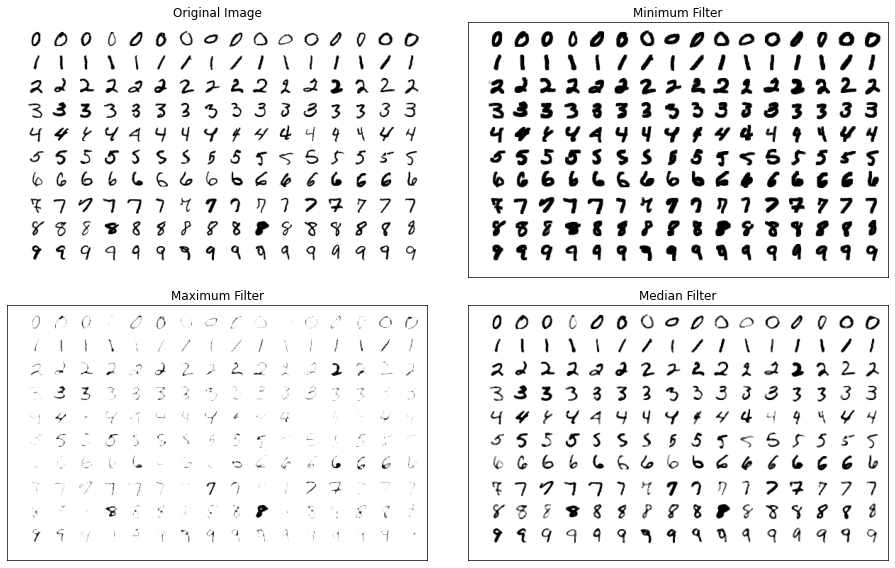

In [7]:
size = 5

%time digits_min = min_filter(digits, size)
%time digits_max = max_filter(digits, size)
%time digits_med = med_filter(digits, size)

fig, axs = plt.subplots(2, 2, figsize=(13,8))

axs[0,0].imshow(digits, cmap="gray")
axs[0,0].set_title('Original Image')
axs[0,1].imshow(digits_min, cmap="gray")
axs[0,1].set_title('Minimum Filter')
axs[1,0].imshow(digits_max, cmap="gray")
axs[1,0].set_title('Maximum Filter')
axs[1,1].imshow(digits_med, cmap="gray")
axs[1,1].set_title('Median Filter')

for ax in axs.ravel():
    ax.axis('off')
fig.tight_layout()
plt.show()

min filter is similar to dilation, max - erosion, and median reduces contrast and sharpness.